In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

/Users/briannagreen/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv")

In [3]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [6]:
df['SEX'].unique()

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters'], dtype=object)

In [7]:
df['SEX'].value_counts()

Male Characters           4783
Female Characters         1967
Genderless Characters       20
Transgender Characters       1
Name: SEX, dtype: int64

<AxesSubplot:>

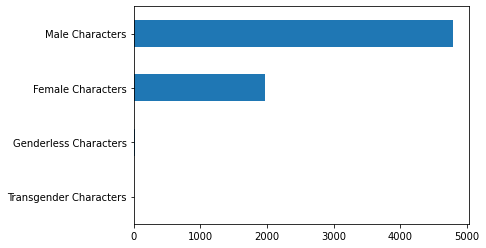

In [8]:
df['SEX'].value_counts(ascending=True).plot(kind='barh')

In [9]:
df_male = df[df['SEX'] == "Male Characters"]

In [10]:
number_male = df_male.count()
number_male

page_id             4783
name                4783
urlslug             4783
ID                  3422
ALIGN               4427
EYE                 2108
HAIR                2984
SEX                 4783
GSM                   34
ALIVE               4782
APPEARANCES         4527
FIRST APPEARANCE    4735
YEAR                4735
dtype: int64

In [11]:
number_male_appearances = df_male["APPEARANCES"].sum()
number_male_appearances

110911.0

In [12]:
df_male['ALIGN'].value_counts(normalize=True)

Bad Characters        0.502146
Good Characters       0.416309
Neutral Characters    0.081093
Reformed Criminals    0.000452
Name: ALIGN, dtype: float64

In [13]:
df_female = df[df['SEX'] == "Female Characters"]

In [14]:
number_female = df_female.count()
number_female

page_id             1967
name                1967
urlslug             1967
ID                  1390
ALIGN               1747
EYE                 1130
HAIR                1621
SEX                 1967
GSM                   29
ALIVE               1966
APPEARANCES         1880
FIRST APPEARANCE    1947
YEAR                1947
dtype: int64

In [15]:
number_female_appearances = df_female["APPEARANCES"].sum()
number_female_appearances

42271.0

In [16]:
df_female['ALIGN'].value_counts(normalize=True)

Good Characters       0.545507
Bad Characters        0.341729
Neutral Characters    0.112192
Reformed Criminals    0.000572
Name: ALIGN, dtype: float64

In [17]:
number_male / (number_male + number_female)

page_id             0.708593
name                0.708593
urlslug             0.708593
ID                  0.711139
ALIGN               0.717039
EYE                 0.651019
HAIR                0.647991
SEX                 0.708593
GSM                 0.539683
ALIVE               0.708654
APPEARANCES         0.706571
FIRST APPEARANCE    0.708620
YEAR                0.708620
dtype: float64

In [18]:
number_male_appearances / (number_male_appearances + number_female_appearances)

0.7240472118133985

<AxesSubplot:>

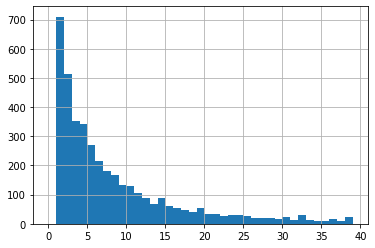

In [19]:
df_male["APPEARANCES"].hist(bins=range(0, 40))

<AxesSubplot:>

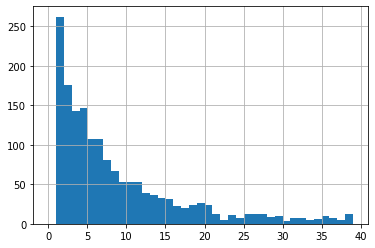

In [20]:
df_female["APPEARANCES"].hist(bins=range(0, 40))

In [21]:
pd.DataFrame(df['HAIR'].unique())

,0
0,Black Hair
1,Brown Hair
2,White Hair
3,Blond Hair
4,Red Hair
5,NaN
6,Green Hair
7,Strawberry Blond Hair
8,Grey Hair
9,Silver Hair


In [22]:
pd.DataFrame(df['EYE'].unique())

,0
0,Blue Eyes
1,Brown Eyes
2,Green Eyes
3,Purple Eyes
4,Black Eyes
5,White Eyes
6,Red Eyes
7,Photocellular Eyes
8,Hazel Eyes
9,Amber Eyes


In [23]:
# See how many characters made their first appearance each year

In [24]:
df_year = df["YEAR"].value_counts().sort_index().rename_axis('YEAR').reset_index(name='count')
df_year.head()

,YEAR,count
0,1935.0,1
1,1936.0,9
2,1937.0,4
3,1938.0,10
4,1939.0,18


In [25]:
# Identify if each character has blond hair + blue eyes, or not

In [26]:
df["blond_blue"] = np.where(((df["HAIR"] == "Blond Hair") | (df["HAIR"] == "Strawberry Blond Hair") | (df["HAIR"] == "Reddish Blond Hair") | (df["HAIR"] == "Gold Hair") | (df["HAIR"] == "Yellow Hair") | (df["HAIR"] == "White Hair")) & (df["EYE"] == "Blue Eyes"), True, False)

In [37]:
df[df["blond_blue"] == True].ALIGN.value_counts(normalize=True)
#df[df["blond_blue"] == True].ALIGN.value_counts(normalize=True).plot(kind='barh')

Good Characters       0.568238
Bad Characters        0.325062
Neutral Characters    0.104218
Reformed Criminals    0.002481
Name: ALIGN, dtype: float64

In [55]:
# Number of characters with blond/blue who are good
df[(df["blond_blue"] == True) & (df["ALIGN"] == "Good Characters")].name.count()

229

In [50]:
# Total number of appearances of good blond/blue characters
df[(df["blond_blue"] == True) & (df["ALIGN"] == "Good Characters")].APPEARANCES.sum()

# Blond/blue good characters made an average of 82.5 appearances

18902.0

In [35]:
df[df["blond_blue"] == False].ALIGN.value_counts(normalize=True)
#df[df["blond_blue"] == False].ALIGN.value_counts(normalize=True).plot(kind='barh')

Bad Characters        0.469111
Good Characters       0.441785
Neutral Characters    0.088764
Reformed Criminals    0.000339
Name: ALIGN, dtype: float64

In [56]:
# Number of characters without blond/blue who are good
df[(df["blond_blue"] == False) & (df["ALIGN"] == "Good Characters")].name.count()

2603

In [51]:
# Total number of appearances of good non blond/blue characters
df[(df["blond_blue"] == False) & (df["ALIGN"] == "Good Characters")].APPEARANCES.sum()

# Non blond/blue good characters made an average of 31.3 appearances

81447.0

In [36]:
# For blond hair, blue eye characters, 57% are good, 33% are bad, and 10% are neutral
# For all other characters, 44% are good, 47% are bad, and 9% are neutral

In [27]:
# How many blond hair/blue eye characters, of any alignment, were introduced each year?

In [28]:
df_year_bb = df[df["blond_blue"] == True].groupby(by="YEAR").blond_blue.count().reset_index(name='blond_blue_count')
df_year_bb

,YEAR,blond_blue_count
0,1938.0,1
1,1939.0,1
2,1940.0,9
3,1941.0,14
4,1942.0,1
5,1943.0,1
6,1944.0,2
7,1946.0,1
8,1947.0,2
9,1948.0,2


In [29]:
# How many total characters, and blond hair/blue eye characters were introduced each year?

In [30]:
df_year = df_year.merge(df_year_bb, left_on='YEAR', right_on='YEAR')
df_year.head()

,YEAR,count,blond_blue_count
0,1938.0,10,1
1,1939.0,18,1
2,1940.0,64,9
3,1941.0,61,14
4,1942.0,52,1


In [31]:
# How many non blond hair/blue eye characters were introduced each year?

In [32]:
df_year_not_bb = df[df["blond_blue"] == False].groupby(by="YEAR").blond_blue.count().reset_index(name='not_blond_blue_count')
df_year_not_bb.head()

,YEAR,not_blond_blue_count
0,1935.0,1
1,1936.0,9
2,1937.0,4
3,1938.0,9
4,1939.0,17


In [33]:
df_year = df_year.merge(df_year_not_bb, left_on='YEAR', right_on='YEAR')
df_year.head()

,YEAR,count,blond_blue_count,not_blond_blue_count
0,1938.0,10,1,9
1,1939.0,18,1,17
2,1940.0,64,9,55
3,1941.0,61,14,47
4,1942.0,52,1,51


In [34]:
# How many blond hair/blue eye characters, with 'Good' alignment, were introduced each year?

In [35]:
df_year_bl_bl_good = df[(df["ALIGN"] == "Good Characters") & (df["blond_blue"] == True)].groupby(by="YEAR").blond_blue.count().reset_index(name="blond_blue_good_count")
#df_year_bl_bl_good = df[(df["ALIGN"] == "Good Characters") & (df["blond_blue"] == True)].groupby(by="Year").count()
df_year_bl_bl_good.head()

,YEAR,blond_blue_good_count
0,1939.0,1
1,1940.0,8
2,1941.0,7
3,1943.0,1
4,1947.0,2


In [36]:
df_year = df_year.merge(df_year_bl_bl_good, left_on='YEAR', right_on='YEAR')
df_year.head()

,YEAR,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count
0,1939.0,18,1,17,1
1,1940.0,64,9,55,8
2,1941.0,61,14,47,7
3,1943.0,14,1,13,1
4,1947.0,20,2,18,2


In [37]:
# How many not blond hair/blue eye characters, with 'Good' alignment, were introduced each year?

In [38]:
df_year_not_bl_bl_good = df[(df["ALIGN"] == "Good Characters") & (df["blond_blue"] == False)].groupby(by="YEAR").blond_blue.count().reset_index(name="not_blond_blue_good_count")
df_year_not_bl_bl_good.head()

,YEAR,not_blond_blue_good_count
0,1936.0,6
1,1937.0,4
2,1938.0,8
3,1939.0,12
4,1940.0,31


In [39]:
df_year = df_year.merge(df_year_not_bl_bl_good, left_on='YEAR', right_on='YEAR')
df_year.head()

,YEAR,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count,not_blond_blue_good_count
0,1939.0,18,1,17,1,12
1,1940.0,64,9,55,8,31
2,1941.0,61,14,47,7,26
3,1943.0,14,1,13,1,2
4,1947.0,20,2,18,2,6


In [40]:
# Percent of 'good' characters in blond/blue eye category, and not blond/blue eye category, for each year

In [41]:
df_year['pct_bl_bl_good'] = df_year['blond_blue_good_count'] / df_year['blond_blue_count']
df_year['pct_not_bl_bl_good'] = df_year['not_blond_blue_good_count'] / df_year['not_blond_blue_count']
df_year.head()

,YEAR,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count,not_blond_blue_good_count,pct_bl_bl_good,pct_not_bl_bl_good
0,1939.0,18,1,17,1,12,1.000000,0.705882
1,1940.0,64,9,55,8,31,0.888889,0.563636
2,1941.0,61,14,47,7,26,0.500000,0.553191
3,1943.0,14,1,13,1,2,1.000000,0.153846
4,1947.0,20,2,18,2,6,1.000000,0.333333


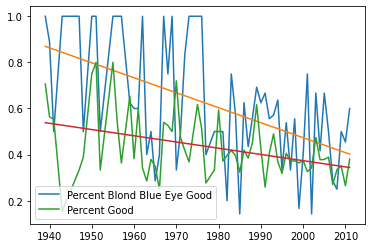

In [43]:
#df_year.plot.line()
plt.plot(df_year['YEAR'], df_year['pct_bl_bl_good'], label='Percent Blond Blue Eye Good')
m, b = np.polyfit(df_year['YEAR'], df_year['pct_bl_bl_good'], 1)
plt.plot(df_year['YEAR'], m*df_year['YEAR'] + b)

plt.plot(df_year['YEAR'], df_year['pct_not_bl_bl_good'], label='Percent Good')
m, b = np.polyfit(df_year['YEAR'], df_year['pct_not_bl_bl_good'], 1)
plt.plot(df_year['YEAR'], m*df_year['YEAR'] + b)

plt.legend()

plt.show()

In [44]:
df_year.to_csv("dc_characters.csv", index=False)